In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Dados/dataset_2.csv')

In [4]:
df.shape

(500, 2)

In [5]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [7]:
df.head()

horas_estudo_mes  salario
0              57.0   6813.0
1              48.0   6855.0
2              60.0   5801.0
3              73.0   7431.0
4              46.0   5475.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [10]:
df.describe()

horas_estudo_mes      salario
count        500.000000   500.000000
mean          50.060000  6018.930000
std           14.659406   848.697853
min            1.000000  3664.000000
25%           39.750000  5473.000000
50%           50.000000  6013.500000
75%           60.000000  6542.000000
max          100.000000  9348.000000

In [11]:
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

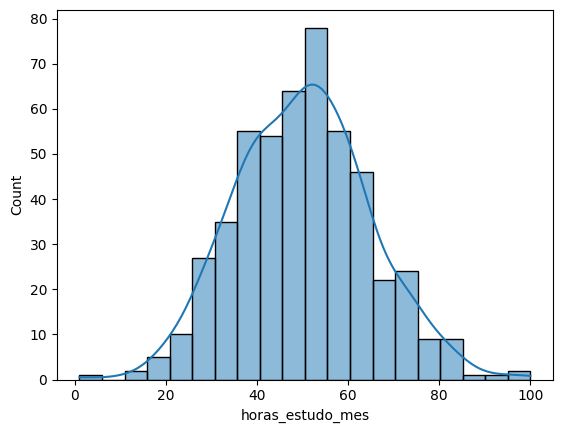

In [12]:
sns.histplot(data = df, x = "horas_estudo_mes", kde = True)

In [13]:
df.corr()

horas_estudo_mes   salario
horas_estudo_mes          1.000000  0.818576
salario                   0.818576  1.000000

<Axes: xlabel='salario', ylabel='horas_estudo_mes'>

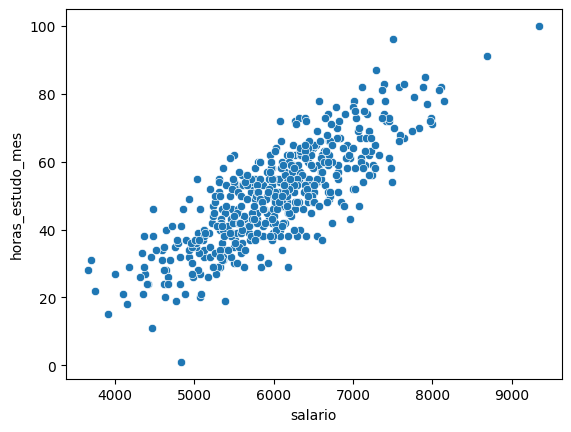

In [15]:
sns.scatterplot(data = df, x = "salario", y = "horas_estudo_mes")

In [16]:
x = np.array(df['horas_estudo_mes'])

In [17]:
type(x)

numpy.ndarray

In [18]:
x = x.reshape(-1,1)

In [19]:
y = df['salario']

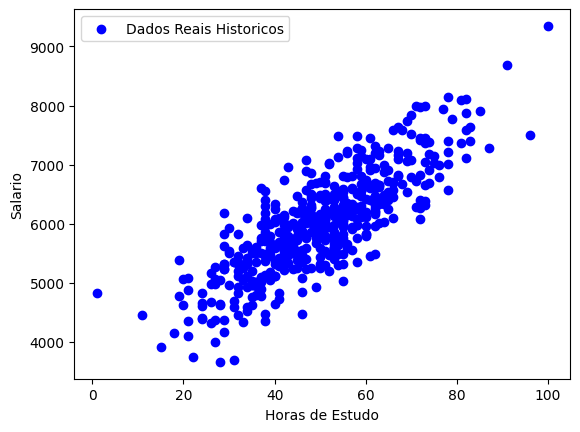

In [20]:
plt.scatter(x,y, color = 'blue', label = 'Dados Reais Historicos')
plt.xlabel("Horas de Estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2, random_state=42)

In [23]:
x_treino.shape

(400, 1)

In [24]:
x_teste.shape

(100, 1)

In [25]:
y_treino.shape

(400,)

In [26]:
y_teste.shape

(100,)

In [27]:
modelo = LinearRegression()

In [29]:
modelo.fit(x_treino, y_treino)

LinearRegression()

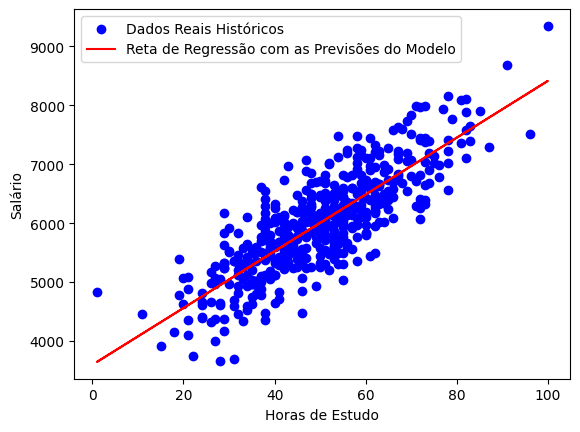

In [30]:
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [31]:
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [32]:
modelo.intercept_

3596.783724372753

In [33]:
modelo.coef_

array([48.18185277])

In [34]:
horas_estudo_novo = np.array([[48]]) 


salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [35]:
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [36]:
horas_estudo_novo = np.array([[65]]) 

salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [37]:
horas_estudo_novo = np.array([[73]]) 

salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]
